In [ ]:
# TASK 1

In [1]:
import numpy as np
import pandas as pd

# Set parameters
num_simulations = 5000
sample_size = 750
sigma_x = 0.85
correlation = 0.85
beta = np.array([1, -1.4, 0.6, 0.2, -0.2, 1])
error_std_dev = 1

# Covariance matrix
cov_matrix = [[sigma_x**2, correlation * sigma_x**2],
              [correlation * sigma_x**2, sigma_x**2]]

# Function to generate simulated data
def get_data():
    # Generate covariates X1 and X2 from a joint normal distribution
    X1, X2 = np.random.multivariate_normal([0, 0], cov_matrix, sample_size).T
    X3 = np.where(X1 < 0, 1, 0)  
    
    # True mean function
    true_mean_function = (beta[0] + beta[1] * X1 + beta[2] * X2 + 
          beta[3] * X3 + beta[4] * X2**2 + beta[5] * X3 * X1)
    
    # Generate the response variable Y
    Y = true_mean_function + np.random.normal(0, error_std_dev, sample_size)
    
    return pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Y': Y})

# Generate simulations
simulation_results = [get_data()['Y'] for _ in range(num_simulations)]

# Convert results to a DataFrame for further analysis
results_df = pd.DataFrame(simulation_results).T
results_df.columns = [f'Simulation_{i+1}' for i in range(num_simulations)]

# Display a summary of the results
print(results_df.describe())


       Simulation_1  Simulation_2  Simulation_3  Simulation_4  Simulation_5  \
count    750.000000    750.000000    750.000000    750.000000    750.000000   
mean       0.651026      0.556505      0.680063      0.649602      0.598019   
std        1.191332      1.189686      1.205108      1.163147      1.179853   
min       -2.946514     -3.419511     -4.367597     -2.649380     -3.456867   
25%       -0.165269     -0.253006     -0.102941     -0.154410     -0.147602   
50%        0.634528      0.592025      0.732667      0.651700      0.608294   
75%        1.423463      1.332513      1.494954      1.431476      1.410134   
max        4.444313      3.641287      4.480453      3.710010      3.675643   

       Simulation_6  Simulation_7  Simulation_8  Simulation_9  Simulation_10  \
count    750.000000    750.000000    750.000000    750.000000     750.000000   
mean       0.596015      0.614981      0.586334      0.521549       0.647498   
std        1.256305      1.218417      1.161876 

## True Model

In [7]:
df = get_data()
simulation_results = []

for i in range(num_simulations):
 # Calculate the mean function µ
    indicator_X3_A = np.where(df['X3'] == 'A', 1, 0)
    
# Calculate the mean response
# µ =β0+β1X1+β2X2+β3·I(X3 =A)+β4X2^2+β5·I(X3 = A)·X1
    mean_response_true = (beta[0] + beta[1] * df['X1'] + beta[2] * df['X2'] 
                     + beta[3] * indicator_X3_A + beta[4] * df['X2']**2 + beta[5] * indicator_X3_A * df['X1'])
    
# Generate errors
    errors = np.random.normal(0, sigma_x, sample_size)
    
# Calculate the response variable Y
    response_Y = mean_response_true + errors
    
# Store the results
    simulation_results.append(response_Y)

# Convert results to a DataFrame for further analysis
results_df = pd.DataFrame(simulation_results).T


results_df.columns = [f'Simulation_{i+1}' for i in range(num_simulations)]

# Display a summary of the results
print(results_df.describe())
results_df.head()

       Simulation_1  Simulation_2  Simulation_3  Simulation_4  Simulation_5  \
count    750.000000    750.000000    750.000000    750.000000    750.000000   
mean       0.851449      0.867444      0.839336      0.887196      0.878276   
std        1.162519      1.190320      1.154900      1.178375      1.143009   
min       -4.316153     -2.800905     -3.425999     -3.274215     -3.627610   
25%        0.095098      0.133044      0.062598      0.168685      0.145645   
50%        0.852080      0.916634      0.821350      0.896145      0.922315   
75%        1.655752      1.663058      1.655549      1.635399      1.612421   
max        4.380536      4.932783      3.912758      3.764166      4.975933   

       Simulation_6  Simulation_7  Simulation_8  Simulation_9  Simulation_10  \
count    750.000000    750.000000    750.000000    750.000000     750.000000   
mean       0.879321      0.907334      0.855411      0.828857       0.861074   
std        1.158425      1.176700      1.163136 

,Simulation_1,Simulation_2,Simulation_3,Simulation_4,Simulation_5,Simulation_6,Simulation_7,Simulation_8,Simulation_9,Simulation_10,...,Simulation_4991,Simulation_4992,Simulation_4993,Simulation_4994,Simulation_4995,Simulation_4996,Simulation_4997,Simulation_4998,Simulation_4999,Simulation_5000
0,1.274081,2.085642,1.733425,1.384692,4.148858,1.991566,1.531892,2.134438,1.958909,2.558945,...,2.138188,2.632631,1.541637,2.477104,2.645872,2.260464,2.648164,2.870809,2.846900,2.165373
1,1.752824,1.367780,0.180236,0.210284,-0.364888,1.065120,1.370309,0.469950,-0.229097,2.109009,...,0.019048,0.934698,0.463613,0.351298,0.292315,0.768616,0.726647,3.494266,1.487599,0.747848
2,2.015454,0.162738,0.226874,0.117382,1.042588,0.871217,-0.195832,-0.616724,2.188268,0.307076,...,0.205379,0.711486,0.556689,-0.102252,-0.655551,1.519224,0.411439,-0.195453,0.099746,1.528202
3,1.404913,3.182237,1.197469,2.246654,1.716772,-0.084650,-0.523858,1.073889,0.926308,1.445543,...,1.515234,0.220932,2.592052,1.613864,1.966550,0.450506,1.567613,0.695383,0.889623,0.677916
4,-0.157554,-0.290771,0.816482,0.932246,0.860869,0.783420,2.133598,1.849563,1.435917,-0.032319,...,1.477095,0.335649,1.325805,0.989228,1.834680,0.654159,1.222793,-1.086648,0.604981,0.104215


In [214]:
true_mean = mean_response_true.mean()

# Output the true mean
print("The true mean µ is:", true_mean)

The true mean µ is: 0.7966600538729536


## Reduced Model

In [9]:
df = get_data()

# Generate results for the reduced model
simulation_results_reduced = []

for i in range(num_simulations):
    # Calculate the indicator for X3 = A (assuming A corresponds to 1)
    indicator_X3_A = np.where(df['X3'] == 1, 1, 0)
    
    # Calculate the mean response for the reduced model
    mean_response_reduced = (beta[0] + beta[1] * df['X1'] + beta[2] * df['X2'] 
                             + beta[3] * indicator_X3_A)
    
    # Generate errors
    errors = np.random.normal(0, error_std_dev, sample_size)
    
    # Calculate the response variable Y
    response_Y_reduced = mean_response_reduced + errors
    
    # Store the results
    simulation_results_reduced.append(response_Y_reduced)

# Convert results to a DataFrame for further analysis
results_df_reduced = pd.DataFrame(simulation_results_reduced).T
results_df_reduced.columns = [f'Simulation_{i+1}' for i in range(num_simulations)]
# Display a summary of the results
print(results_df_reduced.describe())
results_df_reduced.head()

       Simulation_1  Simulation_2  Simulation_3  Simulation_4  Simulation_5  \
count    750.000000    750.000000    750.000000    750.000000    750.000000   
mean       1.066847      1.090792      1.060611      1.089108      1.091617   
std        1.256922      1.316200      1.297046      1.349457      1.332639   
min       -3.355027     -2.644709     -2.969914     -2.751929     -2.873617   
25%        0.158762      0.228304      0.143589      0.193607      0.156771   
50%        1.064696      1.083988      1.109698      1.130791      1.090073   
75%        1.932517      1.973731      1.912499      1.991592      1.999532   
max        4.745008      5.460510      5.200618      4.921096      5.786299   

       Simulation_6  Simulation_7  Simulation_8  Simulation_9  Simulation_10  \
count    750.000000    750.000000    750.000000    750.000000     750.000000   
mean       1.076804      1.098910      1.114633      1.043259       1.083398   
std        1.324257      1.358441      1.364344 

,Simulation_1,Simulation_2,Simulation_3,Simulation_4,Simulation_5,Simulation_6,Simulation_7,Simulation_8,Simulation_9,Simulation_10,...,Simulation_4991,Simulation_4992,Simulation_4993,Simulation_4994,Simulation_4995,Simulation_4996,Simulation_4997,Simulation_4998,Simulation_4999,Simulation_5000
0,0.866213,0.780538,1.990637,2.792934,-0.490095,0.897132,0.069885,1.596492,-0.003336,3.027794,...,1.002350,1.396010,0.720889,0.099552,2.485861,1.101212,3.030138,2.543604,2.624229,0.972111
1,1.779987,-0.167072,2.057302,-0.572106,-0.981131,-0.475505,-1.392864,2.748930,0.248735,-0.640527,...,0.820201,1.560690,1.180186,1.073399,1.925392,2.447082,1.288787,-0.397510,1.176973,-0.856894
2,-0.086205,-1.186564,-0.814278,-1.874456,-0.939039,-0.136007,1.608578,-2.301432,-0.845731,0.951922,...,-1.023032,0.050386,-1.092048,-1.437923,-0.733510,-1.022873,-1.004184,-0.941588,-0.410792,0.472825
3,2.810501,1.563907,3.044344,2.423891,2.777954,2.230499,1.952170,4.672197,4.307743,3.431158,...,4.369940,2.497025,3.061854,1.692358,0.491242,2.482290,1.948290,2.274642,0.887507,3.912671
4,1.768634,1.179079,2.073415,2.087965,4.160321,3.045010,1.937818,1.501986,3.739113,3.943975,...,2.552802,2.751567,1.925434,1.890902,1.994171,3.198343,2.364063,2.415179,2.650765,3.238004


In [196]:
reduced_mean = mean_response_reduced .mean()

print("The reduced mean µ is:", reduced_mean)

The reduced mean µ is: 1.0853651435308675


# Enlarged Model

In [222]:
import numpy as np
import pandas as pd

# Set parameters
num_simulations = 5000
sample_size = 750
sigma_x = 0.85
correlation = 0.85
beta = np.array([1, -1.4, 0.6, 0.2, -0.2, 1, 0, 0])  # Enlarged model with 8 coefficients
error_std_dev = 1

# Covariance matrix
cov_matrix = [[sigma_x**2, correlation * sigma_x**2],
              [correlation * sigma_x**2, sigma_x**2]]

# Function to generate simulated data
def get_data():
    # Generate covariates X1 and X2 from a joint normal distribution
    X1, X2 = np.random.multivariate_normal([0, 0], cov_matrix, sample_size).T
    X3 = np.where(X1 < 0, 1, 0)  
    
    return pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# Generate a single dataset to extract X1, X2, and X3
df = get_data()

# Generate results for the enlarged model
simulation_results_enlarged = []

for i in range(num_simulations):
    # Calculate the indicator for X3 = A (assuming A corresponds to 1)
    indicator_X3_A = np.where(df['X3'] == 1, 1, 0)
    
    # Calculate the mean response for the enlarged model
    mean_response_enlarged = (beta[0] + beta[1] * df['X1'] + beta[2] * df['X2'] +
                              beta[3] * indicator_X3_A + beta[4] * df['X2']**2 +
                              beta[5] * indicator_X3_A * df['X1'] + 
                              beta[6] * df['X2'] +
                              beta[7] * indicator_X3_A * df['X2'])
    
    # Generate errors
    errors = np.random.normal(0, error_std_dev, sample_size)
    
    # Calculate the response variable Y
    response_Y_enlarged = mean_response_enlarged + errors
    
    # Store the results
    simulation_results_enlarged.append(response_Y_enlarged)

# Convert results to a DataFrame for further analysis
results_df_enlarged = pd.DataFrame(simulation_results_enlarged).T
results_df_enlarged.columns = [f'Simulation_{i+1}' for i in range(num_simulations)]

# Display a summary of the results
print(results_df_enlarged.describe())
results_df_enlarged.head()

       Simulation_1  Simulation_2  Simulation_3  Simulation_4  Simulation_5  \
count    750.000000    750.000000    750.000000    750.000000    750.000000   
mean       0.656535      0.699103      0.576402      0.636186      0.582760   
std        1.197627      1.152199      1.229994      1.141567      1.195892   
min       -3.071044     -3.784482     -3.706632     -3.013563     -3.474123   
25%       -0.124824     -0.006698     -0.248295     -0.125206     -0.204943   
50%        0.689886      0.691083      0.629149      0.626914      0.570987   
75%        1.558654      1.440457      1.443334      1.426639      1.421516   
max        4.083885      4.405974      3.413793      4.426761      3.887358   

       Simulation_6  Simulation_7  Simulation_8  Simulation_9  Simulation_10  \
count    750.000000    750.000000    750.000000    750.000000     750.000000   
mean       0.677626      0.644477      0.654429      0.665890       0.627731   
std        1.200541      1.179938      1.193971 

,Simulation_1,Simulation_2,Simulation_3,Simulation_4,Simulation_5,Simulation_6,Simulation_7,Simulation_8,Simulation_9,Simulation_10,...,Simulation_4991,Simulation_4992,Simulation_4993,Simulation_4994,Simulation_4995,Simulation_4996,Simulation_4997,Simulation_4998,Simulation_4999,Simulation_5000
0,2.736612,1.607700,2.152190,2.151927,2.987572,0.649972,0.714796,1.046036,2.100000,2.134364,...,1.268387,0.739590,3.887009,1.889263,-0.635901,1.953055,2.733850,1.204037,1.162393,2.742050
1,-1.736702,-0.601607,1.958294,0.526059,-0.266046,1.013844,1.056010,0.793336,-1.493319,-0.511022,...,0.650191,1.039548,0.481855,-0.516085,1.622442,1.837958,-0.650174,0.597068,-0.835198,0.583884
2,1.216046,1.479035,0.082652,0.138880,1.410412,1.585087,2.506600,0.040849,0.005077,0.567596,...,-0.054724,0.697466,1.280692,3.941808,3.247923,0.524256,2.182221,0.986850,2.392619,1.079819
3,1.213619,1.870651,-0.114246,0.541959,-0.265710,1.219759,-0.417015,1.429091,1.065863,1.923914,...,-1.734250,0.536755,1.026324,-0.883973,-0.694376,3.287626,-0.662021,0.257183,-0.012225,-0.903633
4,1.109390,1.371966,2.431734,1.080375,2.052870,1.799678,1.260298,0.668628,0.337455,0.455616,...,0.794725,0.813097,-0.537222,-0.367418,0.965153,0.514286,2.005864,0.001514,0.951412,1.982272


In [226]:
enlarged_mean = mean_response_enlarged.mean()
print("The enlarged mean µ is:", enlarged_mean)

The enlarged mean µ is: 0.6336552094110057


In [41]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


In [13]:
# Function to train model using statsmodels and return AIC and MSE
def train_model(X, Y):
    model = sm.OLS(Y, X).fit()  # Fit OLS model
    mse = mean_squared_error(Y, model.fittedvalues)  # Compute MSE
    aic = model.aic  # Extract AIC from statsmodels
    return model, aic, mse


In [15]:
# Function to perform 10-fold cross-validation and get MSE
def cross_validation(X, Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    mse_list = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Instantiate OLS model with the split data
        model = sm.OLS(Y_train, X_train).fit()
        
        # Predict on the test set
        predictions = model.predict(X_test)

        # Calculate MSE for the current fold
        mse_list.append(mean_squared_error(Y_test, predictions))

    # Return the average MSE over all folds
    return np.mean(mse_list)


In [17]:
# Generate data
df = get_data()

# Prepare X and Y
X = df[['X1', 'X2', 'X3']]
Y = df['Y']

# Train model and get AIC and MSE
model, aic, mse = train_model(X, Y)
print(f"AIC: {aic}, MSE: {mse}")

# Perform cross-validation
cv_mse = cross_validation(X, Y)
print(f"Cross-Validated MSE: {cv_mse}")


AIC: 2283.533001328774, MSE: 1.2199789469879556
Cross-Validated MSE: 1.2346133497690257


In [19]:
model_selection_results = []

for i in range(num_simulations):
    # Generate data
    df = get_data()
    
    # Prepare X and Y
    X = df[['X1', 'X2', 'X3']]
    Y = df['Y']
    
    # Train true model
    model, aic_true, mse_true = train_model(X, Y)
    
    # Train reduced model
    X_reduced = X[['X1', 'X2', 'X3']]
    model_reduced, aic_reduced, mse_reduced = train_model(X_reduced, Y)
    
    # Train enlarged model (you can adjust based on your setup)
    X_enlarged = np.column_stack((X, df['X2']**2, df['X3'] * df['X1']))
    model_enlarged, aic_enlarged, mse_enlarged = train_model(X_enlarged, Y)
    
    # Collect results
    model_selection_results.append({
        'Iteration': i + 1,
        'AIC_True': aic_true,
        'MSE_True': mse_true,
        'AIC_Reduced': aic_reduced,
        'MSE_Reduced': mse_reduced,
        'AIC_Enlarged': aic_enlarged,
        'MSE_Enlarged': mse_enlarged
    })

# Convert to DataFrame
model_selection_df = pd.DataFrame(model_selection_results)
print(model_selection_df)


      Iteration     AIC_True  MSE_True  AIC_Reduced  MSE_Reduced  \
0             1  2308.546781  1.261353  2308.546781     1.261353   
1             2  2359.713458  1.350409  2359.713458     1.350409   
2             3  2410.429168  1.444883  2410.429168     1.444883   
3             4  2366.618908  1.362900  2366.618908     1.362900   
4             5  2322.862202  1.285660  2322.862202     1.285660   
...         ...          ...       ...          ...          ...   
4995       4996  2310.985229  1.265461  2310.985229     1.265461   
4996       4997  2368.877384  1.367010  2368.877384     1.367010   
4997       4998  2289.957694  1.230474  2289.957694     1.230474   
4998       4999  2345.887016  1.325742  2345.887016     1.325742   
4999       5000  2201.293411  1.093278  2201.293411     1.093278   

      AIC_Enlarged  MSE_Enlarged  
0      2247.796249      1.157024  
1      2326.701109      1.285384  
2      2365.730277      1.354045  
3      2288.738560      1.221942  
4      2

In [21]:
# Initialize counters for model selection results
true_count_aic = 0
reduced_count_aic = 0
enlarged_count_aic = 0
true_count_cross_val = 0
reduced_count_cross_val = 0
enlarged_count_cross_val = 0

# Store model summaries for each simulation
model_summaries = []


In [23]:
def true_model(data):
    # Assuming true model uses X1, X2, and X3, plus interaction terms as per your earlier setup
    X = data[['X1', 'X2', 'X3']]
    X['X2_squared'] = X['X2'] ** 2
    X['X3_X1'] = X['X3'] * X['X1']
    return sm.add_constant(X)  # Adds a constant term for the intercept

def reduced_model(data):
    # Assuming reduced model uses only X1, X2, and X3
    X = data[['X1', 'X2', 'X3']]
    return sm.add_constant(X)

def enlarged_model(data):
    # Assuming enlarged model includes all the previous terms plus more
    X = data[['X1', 'X2', 'X3']]
    X['X2_squared'] = X['X2'] ** 2
    X['X3_X1'] = X['X3'] * X['X1']
    X['X2'] = X['X2']  # Adding X2 again (if required for your context)
    X['X3_X2'] = X['X3'] * X['X2']  # Interaction term
    return sm.add_constant(X)  # Adds a constant term for the intercept


In [25]:
for _ in range(num_simulations):
    # Generate a new dataset
    data = get_data()
    Y = data['Y']

    # Create design matrices for each model using the defined functions
    X_true = true_model(data)
    X_reduced = reduced_model(data)
    X_enlarged = enlarged_model(data)

    # Train models and compute AIC and MSE
    model_true, aic_true, mse_true = train_model(X_true, Y)
    model_reduced, aic_reduced, mse_reduced = train_model(X_reduced, Y)
    model_enlarged, aic_enlarged, mse_enlarged = train_model(X_enlarged, Y)

    # Store OLS summaries
    model_summaries.append({
        'true': model_true.summary(),
        'reduced': model_reduced.summary(),
        'enlarged': model_enlarged.summary()
    })

    # Select model based on AIC
    min_aic = min(aic_true, aic_reduced, aic_enlarged)
    if min_aic == aic_true:
        true_count_aic += 1
    elif min_aic == aic_reduced:
        reduced_count_aic += 1
    else:
        enlarged_count_aic += 1

    # Perform cross-validation and compute MSE
    mse_true_cv = cross_validation(X_true, Y)
    mse_reduced_cv = cross_validation(X_reduced, Y)
    mse_enlarged_cv = cross_validation(X_enlarged, Y)

    # Select model based on cross-validated MSE
    min_mse = min(mse_true_cv, mse_reduced_cv, mse_enlarged_cv)
    if min_mse == mse_true_cv:
        true_count_cross_val += 1
    elif min_mse == mse_reduced_cv:
        reduced_count_cross_val += 1
    else:
        enlarged_count_cross_val += 1


In [275]:
# Create a function to display selection results
def display_selection_results(true_count_aic, reduced_count_aic, enlarged_count_aic,
                              true_count_cross_val, reduced_count_cross_val, enlarged_count_cross_val):
    
    # Display results for AIC-based selection
    print("AIC-based selection:")
    aic_results = {
        'True Model': true_count_aic,
        'Reduced Model': reduced_count_aic,
        'Enlarged Model': enlarged_count_aic
    }
    for model, count in aic_results.items():
        print(f"{model}: {count}")

    # Display results for cross-validated MSE-based selection
    print("\nCross-validated MSE-based selection:")
    cv_mse_results = {
        'True Model': true_count_cross_val,
        'Reduced Model': reduced_count_cross_val,
        'Enlarged Model': enlarged_count_cross_val
    }
    for model, count in cv_mse_results.items():
        print(f"{model}: {count}")

# Call the function to display results
display_selection_results(true_count_aic, reduced_count_aic, enlarged_count_aic,
                          true_count_cross_val, reduced_count_cross_val, enlarged_count_cross_val)


AIC-based selection:
True Model: 4195
Reduced Model: 0
Enlarged Model: 805

Cross-validated MSE-based selection:
True Model: 4106
Reduced Model: 0
Enlarged Model: 894


In [27]:
# Prepare data for plotting
models = ['True Model', 'Reduced Model', 'Enlarged Model']

# Combine counts into a dictionary for better structure
model_metrics = {
    'AIC': [true_count_aic, reduced_count_aic, enlarged_count_aic],
    'CV_MSE': [true_count_cross_val, reduced_count_cross_val, enlarged_count_cross_val]
}

# Create an array for the x positions
x = np.arange(len(models))
width = 0.35  # Width of the bars

# Extract AIC and CV_MSE counts separately for clarity
aic_counts = model_metrics['AIC']
cv_mse_counts = model_metrics['CV_MSE']


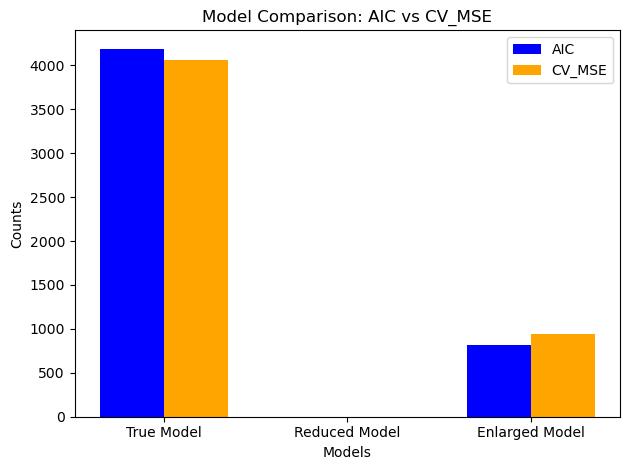

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming true_count_aic, reduced_count_aic, enlarged_count_aic,
# true_count_cross_val, reduced_count_cross_val, enlarged_count_cross_val are defined

models = ['True Model', 'Reduced Model', 'Enlarged Model']

# Combine counts into a dictionary for better structure
model_metrics = {
    'AIC': [true_count_aic, reduced_count_aic, enlarged_count_aic],
    'CV_MSE': [true_count_cross_val, reduced_count_cross_val, enlarged_count_cross_val]
}

# Create an array for the x positions
x = np.arange(len(models))
width = 0.35  # Width of the bars

# Extract AIC and CV_MSE counts separately for clarity
aic_counts = model_metrics['AIC']
cv_mse_counts = model_metrics['CV_MSE']

# Create the bar plot
fig, ax = plt.subplots()

# Create bars for AIC and CV_MSE
bars1 = ax.bar(x - width/2, aic_counts, width, label='AIC', color='blue')
bars2 = ax.bar(x + width/2, cv_mse_counts, width, label='CV_MSE', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Counts')
ax.set_title('Model Comparison: AIC vs CV_MSE')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [31]:
# Display OLS summaries for the last simulation
print("\nOLS Summaries for the last simulation:")
for model_type in ['true', 'reduced', 'enlarged']:
    summary = model_summaries[-1][model_type]
    print(f"{model_type.capitalize()} Model Summary:\n{summary}\n{'-' * 40}")



OLS Summaries for the last simulation:
True Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     64.42
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           7.01e-56
Time:                        18:01:09   Log-Likelihood:                -1043.9
No. Observations:                 750   AIC:                             2100.
Df Residuals:                     744   BIC:                             2128.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------